In [1]:
#Importing all the packages

import numpy as np
import pandas as pd
import io

import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import math

import warnings

import io

import time





from sklearn.model_selection import train_test_split

from scipy import stats

warnings.filterwarnings("ignore")

# Business objective

A life insurance company named "LIFE UK" wants to predict the average age of a casualty in road accidents in the UK. With the use of this prediction, the company hopes to determine the level of risk associated with insuring drivers of different age groups and adjust their premiums accordingly. The company has access to a large quantity of data about accidents in the UK, such as the date, time, location, number and type of vehicles involved, weather conditions,the age of the drivers and passengers, among many other variables. On this paper, we will provide descriptive and exploratory data analysis on the chosen dataset and prepare the data to be possible to build models that predict the age of the casualty accurately

In [2]:
#Adding The time to check run duration 
Start_time = time.time()

def notebook_timer(xl):
    
    def wrapper (*args, **kwargs):
        
        start_time = time.time()
        
        result = fn(*args,**kwargs)
        
        end_time = time.time()
        
        time_taken = round(end_time - start_time, 4)
        
        if time_taken < 60:
            
            print(f'{fn.__name__} took {time_taken} seconds to run')

        else :

            print(f'{fn.__name__} took {time_taken/60} minutes to run')

        return result

    return wrapper

In this data set the trining is done on 70%  ofdata and testing is 30%.Here the target variable is age of the casuality so we want to build a Model to predict and compare there accuracies with other models that are formulated.

# Data Prepration

In [3]:
#Importing the data sets that are formulated by Train test split
Xt = pd.read_csv("X_train.csv")
Xte = pd.read_csv("X_test.csv")
Yt = pd.read_csv("y_train.csv")
Yte = pd.read_csv("y_test.csv")



In [4]:
#getting the data
Xt.head()

,Unnamed: 0,number_of_vehicles,number_of_casualties,speed_limit,location_easting_osgr,location_northing_osgr,casualty_severity_Serious,casualty_severity_Slight,did_police_officer_attend_scene_of_accident_Yes,pedestrian_location_Crossing in zig-zag approach lines,...,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road,carriageway_hazards_unknown (self reported),casualty_class_Passenger,casualty_class_Pedestrian,casualty_home_area_type_Small town,casualty_home_area_type_Urban area,accident_severity_Serious,accident_severity_Slight,sex_of_casualty_Male
0,0,0.142129,-0.409857,0.329822,0.436991,0.077867,-0.389537,0.393385,-1.373561,-0.025091,...,-0.03723,-0.070226,-0.236515,-0.344479,-0.394024,-0.087221,0.121708,-0.420281,0.425037,0.666424
1,1,0.142129,-0.409857,0.329822,1.007925,-0.250358,-0.389537,0.393385,-1.373561,-0.025091,...,-0.03723,-0.070226,-0.236515,-0.344479,-0.394024,-0.087221,0.121708,-0.420281,0.425037,0.666424
2,2,0.142129,-0.409857,-0.883648,-0.009375,-0.478298,-0.389537,0.393385,-1.373561,-0.025091,...,-0.03723,-0.070226,-0.236515,-0.344479,-0.394024,-0.087221,0.121708,-0.420281,0.425037,0.666424
3,3,0.142129,-0.409857,0.329822,0.952168,0.205524,-0.389537,0.393385,-1.373561,-0.025091,...,-0.03723,-0.070226,-0.236515,-0.344479,-0.394024,-0.087221,0.121708,-0.420281,0.425037,0.666424
4,4,0.142129,-0.409857,0.329822,0.437497,1.511935,-0.389537,0.393385,-1.373561,-0.025091,...,-0.03723,-0.070226,-0.236515,-0.344479,-0.394024,-0.087221,0.121708,-0.420281,0.425037,0.666424


In [5]:
#finding the type of variables in data set
Xt.dtypes

Unnamed: 0                                                                                       int64
number_of_vehicles                                                                             float64
number_of_casualties                                                                           float64
speed_limit                                                                                    float64
location_easting_osgr                                                                          float64
location_northing_osgr                                                                         float64
casualty_severity_Serious                                                                      float64
casualty_severity_Slight                                                                       float64
did_police_officer_attend_scene_of_accident_Yes                                                float64
pedestrian_location_Crossing in zig-zag approach lines                   

In [6]:
#Values of the data
Yt.head()

,Unnamed: 0,age_of_casualty
0,0,21.0
1,1,35.0
2,2,19.0
3,3,26.0
4,4,47.0


Here there is a duplicate colum which need to be dropped

In [7]:
Yt=Yt.drop(["Unnamed: 0"],axis=1)

In [8]:
Yt.head()

,age_of_casualty
0,21.0
1,35.0
2,19.0
3,26.0
4,47.0


In [9]:
#Dimensions 
print(Xt.shape)
print(Yt.shape)

(7947, 39)
(7947, 1)


# Selection Of Predictors

I am selecting 20 colums from the dataset which I found to be reasonable while formulating the model

In [10]:
#Selectig the variables and formulating the data set
xt = Xt.loc[:,['casualty_class_Passenger', 'casualty_severity_Slight', 'casualty_severity_Serious', 'accident_severity_Slight', 'accident_severity_Serious', 'number_of_casualties', 'pedestrian_location_Unknown or other', 'speed_limit', 'pedestrian_location_Crossing on pedestrian crossing facility', 'did_police_officer_attend_scene_of_accident_Yes', 'pedestrian_location_In carriageway, crossing elsewhere', 'weather_conditions_Snowing + high winds', 'number_of_vehicles', 'weather_conditions_Unknown', 'casualty_home_area_type_Small town', 'carriageway_hazards_unknown (self reported)', 'pedestrian_location_In centre of carriageway - not on refuge, island or central reservation', 'carriageway_hazards_Other object on road','weather_conditions_Fine no high winds', 'pedestrian_location_On footway or verge']]

In [11]:

#xt = X_t.loc[:,['accident_severity_Serious','accident_severity_Slight' , 'sex_of_casualty_Male','number_of_casualties','number_of_vehicles','speed_limit','casualty_severity_Serious','casualty_severity_Slight',
                          # 'did_police_officer_attend_scene_of_accident_Yes','weather_conditions_Fine no high winds','carriageway_hazards_Pedestrian in carriageway - not injured','weather_conditions_Raining + high winds','pedestrian_location_On footway or verge','weather_conditions_Raining no high winds'
                          # ,'weather_conditions_Snowing no high winds','weather_conditions_Unknown','casualty_class_Passenger','casualty_class_Pedestrian']]

In [12]:
#Dimension of the new dataframe
xt.shape

(7947, 20)

In [13]:
#Selecting the Variablles
xte = Xte.loc[:,['casualty_class_Passenger', 'casualty_severity_Slight', 'casualty_severity_Serious', 'accident_severity_Slight', 'accident_severity_Serious', 'number_of_casualties', 'pedestrian_location_Unknown or other', 'speed_limit', 'pedestrian_location_Crossing on pedestrian crossing facility', 'did_police_officer_attend_scene_of_accident_Yes', 'pedestrian_location_In carriageway, crossing elsewhere', 'weather_conditions_Snowing + high winds', 'number_of_vehicles', 'weather_conditions_Unknown', 'casualty_home_area_type_Small town', 'carriageway_hazards_unknown (self reported)', 'pedestrian_location_In centre of carriageway - not on refuge, island or central reservation', 'carriageway_hazards_Other object on road','weather_conditions_Fine no high winds', 'pedestrian_location_On footway or verge']]

In [14]:
#xt=Xte.loc[:,['accident_severity_Serious','accident_severity_Slight' , 'sex_of_casualty_Male','number_of_casualties','number_of_vehicles','speed_limit','casualty_severity_Serious','casualty_severity_Slight',
                           #'did_police_officer_attend_scene_of_accident_Yes','weather_conditions_Fine no high winds','carriageway_hazards_Pedestrian in carriageway - not injured','weather_conditions_Raining + high winds','pedestrian_location_On footway or verge','weather_conditions_Raining no high winds'
                           #,'weather_conditions_Snowing no high winds','weather_conditions_Unknown','casualty_class_Passenger','casualty_class_Pedestrian']]

In [15]:
#Printing the size of the data
xte.shape

(3243, 20)

In [16]:
#Merging the Datasets and forming trainset by merging traindata.
trainset=xt.merge(Yt, left_index=True, right_index=True)
trainset.shape

(7947, 21)

In [17]:
#Display the data
trainset.head()

,casualty_class_Passenger,casualty_severity_Slight,casualty_severity_Serious,accident_severity_Slight,accident_severity_Serious,number_of_casualties,pedestrian_location_Unknown or other,speed_limit,pedestrian_location_Crossing on pedestrian crossing facility,did_police_officer_attend_scene_of_accident_Yes,...,weather_conditions_Snowing + high winds,number_of_vehicles,weather_conditions_Unknown,casualty_home_area_type_Small town,carriageway_hazards_unknown (self reported),"pedestrian_location_In centre of carriageway - not on refuge, island or central reservation",carriageway_hazards_Other object on road,weather_conditions_Fine no high winds,pedestrian_location_On footway or verge,age_of_casualty
0,-0.344479,0.393385,-0.389537,0.425037,-0.420281,-0.409857,-0.116824,0.329822,-0.181336,-1.373561,...,-0.019433,0.142129,-0.190394,-0.087221,-0.236515,-0.074616,-0.123296,0.538218,-0.119018,21.0
1,-0.344479,0.393385,-0.389537,0.425037,-0.420281,-0.409857,-0.116824,0.329822,-0.181336,-1.373561,...,-0.019433,0.142129,-0.190394,-0.087221,-0.236515,-0.074616,-0.123296,0.538218,-0.119018,35.0
2,-0.344479,0.393385,-0.389537,0.425037,-0.420281,-0.409857,-0.116824,-0.883648,-0.181336,-1.373561,...,-0.019433,0.142129,-0.190394,-0.087221,-0.236515,-0.074616,-0.123296,0.538218,-0.119018,19.0
3,-0.344479,0.393385,-0.389537,0.425037,-0.420281,-0.409857,-0.116824,0.329822,-0.181336,-1.373561,...,-0.019433,0.142129,-0.190394,-0.087221,-0.236515,-0.074616,-0.123296,0.538218,-0.119018,26.0
4,-0.344479,0.393385,-0.389537,0.425037,-0.420281,-0.409857,-0.116824,0.329822,-0.181336,-1.373561,...,-0.019433,0.142129,-0.190394,-0.087221,-0.236515,-0.074616,-0.123296,0.538218,-0.119018,47.0


In [18]:
#Display test Data and Dimensions of the data
testset=xte.merge(Yte, left_index=True, right_index=True)
testset.shape


(3243, 22)

In [19]:
testset.head()

,casualty_class_Passenger,casualty_severity_Slight,casualty_severity_Serious,accident_severity_Slight,accident_severity_Serious,number_of_casualties,pedestrian_location_Unknown or other,speed_limit,pedestrian_location_Crossing on pedestrian crossing facility,did_police_officer_attend_scene_of_accident_Yes,...,number_of_vehicles,weather_conditions_Unknown,casualty_home_area_type_Small town,carriageway_hazards_unknown (self reported),"pedestrian_location_In centre of carriageway - not on refuge, island or central reservation",carriageway_hazards_Other object on road,weather_conditions_Fine no high winds,pedestrian_location_On footway or verge,Unnamed: 0,age_of_casualty
0,-0.355023,0.415272,-0.412206,0.447462,-0.442987,-0.405723,-0.118622,-0.887251,-0.201056,0.737757,...,-1.452495,-0.195172,-0.088141,-0.229304,-0.074709,-0.133756,0.539447,-0.127655,0,13.0
1,-0.355023,0.415272,-0.412206,0.447462,-0.442987,-0.405723,-0.118622,-0.887251,-0.201056,0.737757,...,-1.452495,-0.195172,-0.088141,-0.229304,-0.074709,-0.133756,0.539447,-0.127655,1,3.0
2,-0.355023,0.415272,-0.412206,0.447462,-0.442987,-0.405723,-0.118622,-0.887251,-0.201056,0.737757,...,-1.452495,-0.195172,-0.088141,-0.229304,-0.074709,-0.133756,0.539447,-0.127655,2,42.0
3,-0.355023,0.415272,-0.412206,0.447462,-0.442987,-0.405723,-0.118622,-0.887251,-0.201056,0.737757,...,-1.452495,-0.195172,-0.088141,-0.229304,-0.074709,-0.133756,0.539447,-0.127655,3,12.0
4,-0.355023,0.415272,-0.412206,0.447462,-0.442987,-0.405723,-0.118622,0.312147,-0.201056,0.737757,...,-1.452495,-0.195172,-0.088141,-0.229304,-0.074709,-0.133756,0.539447,-0.127655,4,17.0


# Identifying outliers and missing values

In [20]:
#Calculate the z-score for each data point using the mean and standard deviation of the target variable in the training set.
from scipy.stats import zscore
trainset['zscore'] = zscore(trainset['age_of_casualty'])

In [21]:
testset['zscore'] = zscore(testset['age_of_casualty'])

In [22]:
# Define outliers in training set
trainset['outlier'] = abs(trainset['zscore']) > 3

# Define outliers in test set using the mean and standard deviation from the training set
testset['age_of_casualty'] = (testset['age_of_casualty']- trainset['age_of_casualty'].mean()) / trainset['age_of_casualty'].std()
testset['outlier'] = abs(testset['zscore']) > 3

In [23]:
trainset= trainset[trainset['outlier'] == False]

# Remove outliers from test set
testset = testset[testset['outlier'] == False]

In [24]:
#Getting thhe  size f the dataset after eliminating outliers
trainset.shape

(7889, 23)

In [25]:
#after eliminating outliers
testset.shape

(3214, 24)

Checking for the Missing values by using isnull function

In [26]:
trainset.isnull().sum()

casualty_class_Passenger                                                                       0
casualty_severity_Slight                                                                       0
casualty_severity_Serious                                                                      0
accident_severity_Slight                                                                       0
accident_severity_Serious                                                                      0
number_of_casualties                                                                           0
pedestrian_location_Unknown or other                                                           0
speed_limit                                                                                    0
pedestrian_location_Crossing on pedestrian crossing facility                                   0
did_police_officer_attend_scene_of_accident_Yes                                                0
pedestrian_location_In carriag

In [27]:
#printing Columns
trainset.columns

Index(['casualty_class_Passenger', 'casualty_severity_Slight',
       'casualty_severity_Serious', 'accident_severity_Slight',
       'accident_severity_Serious', 'number_of_casualties',
       'pedestrian_location_Unknown or other', 'speed_limit',
       'pedestrian_location_Crossing on pedestrian crossing facility',
       'did_police_officer_attend_scene_of_accident_Yes',
       'pedestrian_location_In carriageway, crossing elsewhere',
       'weather_conditions_Snowing + high winds', 'number_of_vehicles',
       'weather_conditions_Unknown', 'casualty_home_area_type_Small town',
       'carriageway_hazards_unknown (self reported)',
       'pedestrian_location_In centre of carriageway - not on refuge, island or central reservation',
       'carriageway_hazards_Other object on road',
       'weather_conditions_Fine no high winds',
       'pedestrian_location_On footway or verge', 'age_of_casualty', 'zscore',
       'outlier'],
      dtype='object')

In [28]:
testset.isnull().sum()

casualty_class_Passenger                                                                       0
casualty_severity_Slight                                                                       0
casualty_severity_Serious                                                                      0
accident_severity_Slight                                                                       0
accident_severity_Serious                                                                      0
number_of_casualties                                                                           0
pedestrian_location_Unknown or other                                                           0
speed_limit                                                                                    0
pedestrian_location_Crossing on pedestrian crossing facility                                   0
did_police_officer_attend_scene_of_accident_Yes                                                0
pedestrian_location_In carriag

To predict the dependency betweeen the variables we find Correlation Matrix to selct appropriate features and to formulate  a best Model.Here I am using Pearson coefficient.

In [29]:
#Correlation Matrix
corr1=trainset.corr(method='pearson')
corr1["age_of_casualty"].sort_values(ascending=False)

age_of_casualty                                                                                1.000000
zscore                                                                                         1.000000
casualty_severity_Serious                                                                      0.052780
accident_severity_Serious                                                                      0.048380
pedestrian_location_Unknown or other                                                           0.034758
speed_limit                                                                                    0.030450
casualty_home_area_type_Small town                                                             0.017035
weather_conditions_Fine no high winds                                                          0.014186
carriageway_hazards_Other object on road                                                       0.012774
did_police_officer_attend_scene_of_accident_Yes                 

In [30]:
#Deleting the outliers
trainset.drop(['outlier'], axis=1, inplace=True)

In [31]:
#Printing coefficient Values
corr2=trainset.corr(method='pearson')
corr2["age_of_casualty"].sort_values(ascending=False)

age_of_casualty                                                                                1.000000
zscore                                                                                         1.000000
casualty_severity_Serious                                                                      0.052780
accident_severity_Serious                                                                      0.048380
pedestrian_location_Unknown or other                                                           0.034758
speed_limit                                                                                    0.030450
casualty_home_area_type_Small town                                                             0.017035
weather_conditions_Fine no high winds                                                          0.014186
carriageway_hazards_Other object on road                                                       0.012774
did_police_officer_attend_scene_of_accident_Yes                 

Checking how good our variables are corelated.Before using a Corelation Matrix I will use the scatter matrix to visualize the relation between Target and some indepent variables.We can use pairplots also to know these relations but I am think this is more convienient.

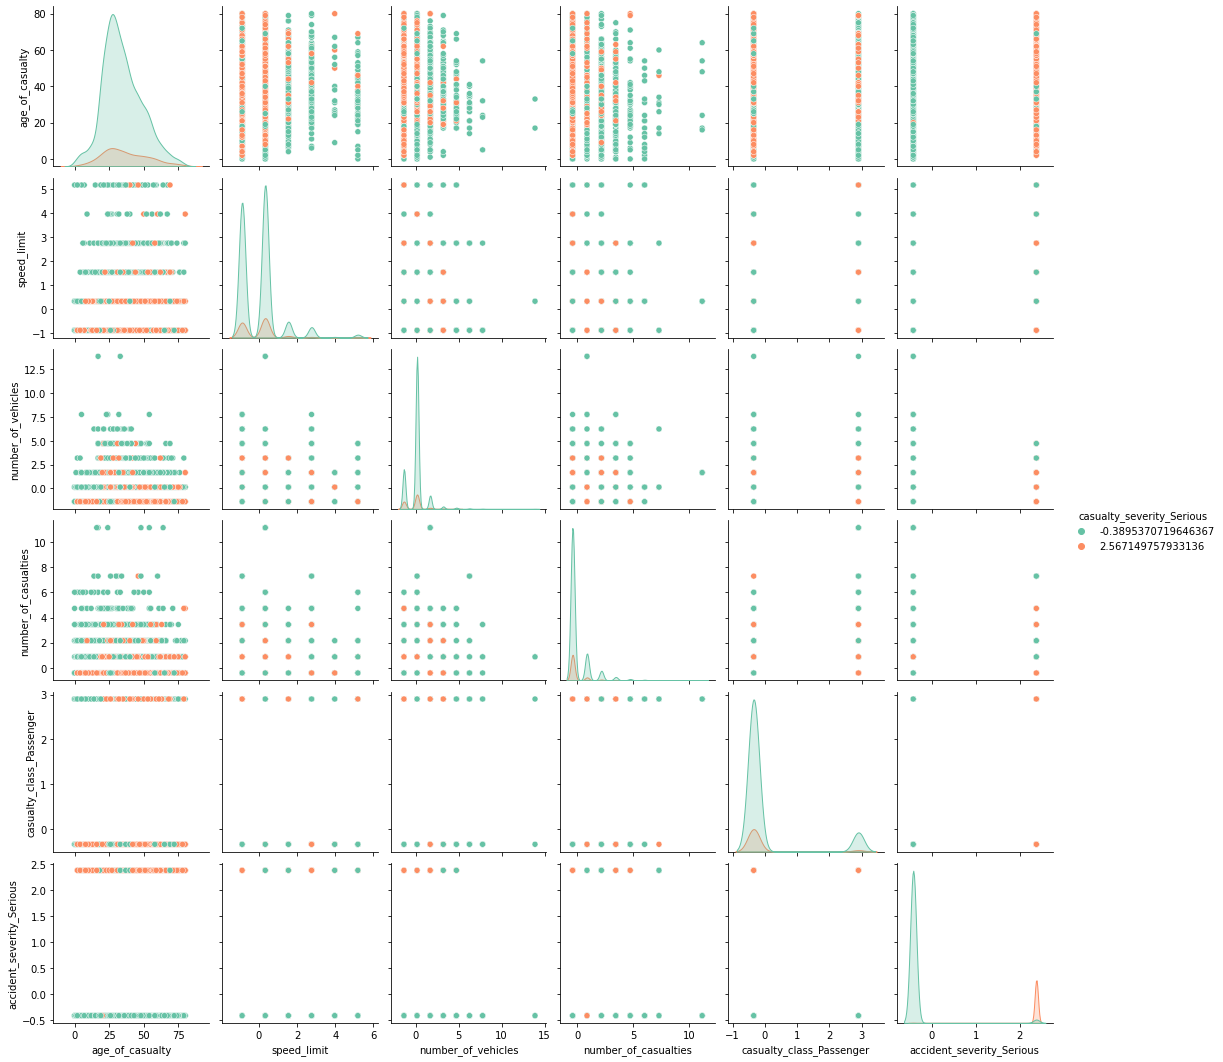

In [32]:
import seaborn as sns

# Define the data to plot
a = ["age_of_casualty", "speed_limit", "number_of_vehicles", "number_of_casualties", "casualty_class_Passenger", "casualty_severity_Serious", "accident_severity_Serious"]

# Create a pairplot with different colors for each value of the casualty_severity_Serious variable
sns.pairplot(trainset[a], hue="casualty_severity_Serious", palette="Set2")
plt.show()


From above we see  there is a positive correlation between age of Casuality and casualty_severity_Serious.which claims that the severity of casualties rises with increasing age.We can also notice that there are relations between age of casuality and accident severity and Speed limit.

# Corelation Matrix

<AxesSubplot:>

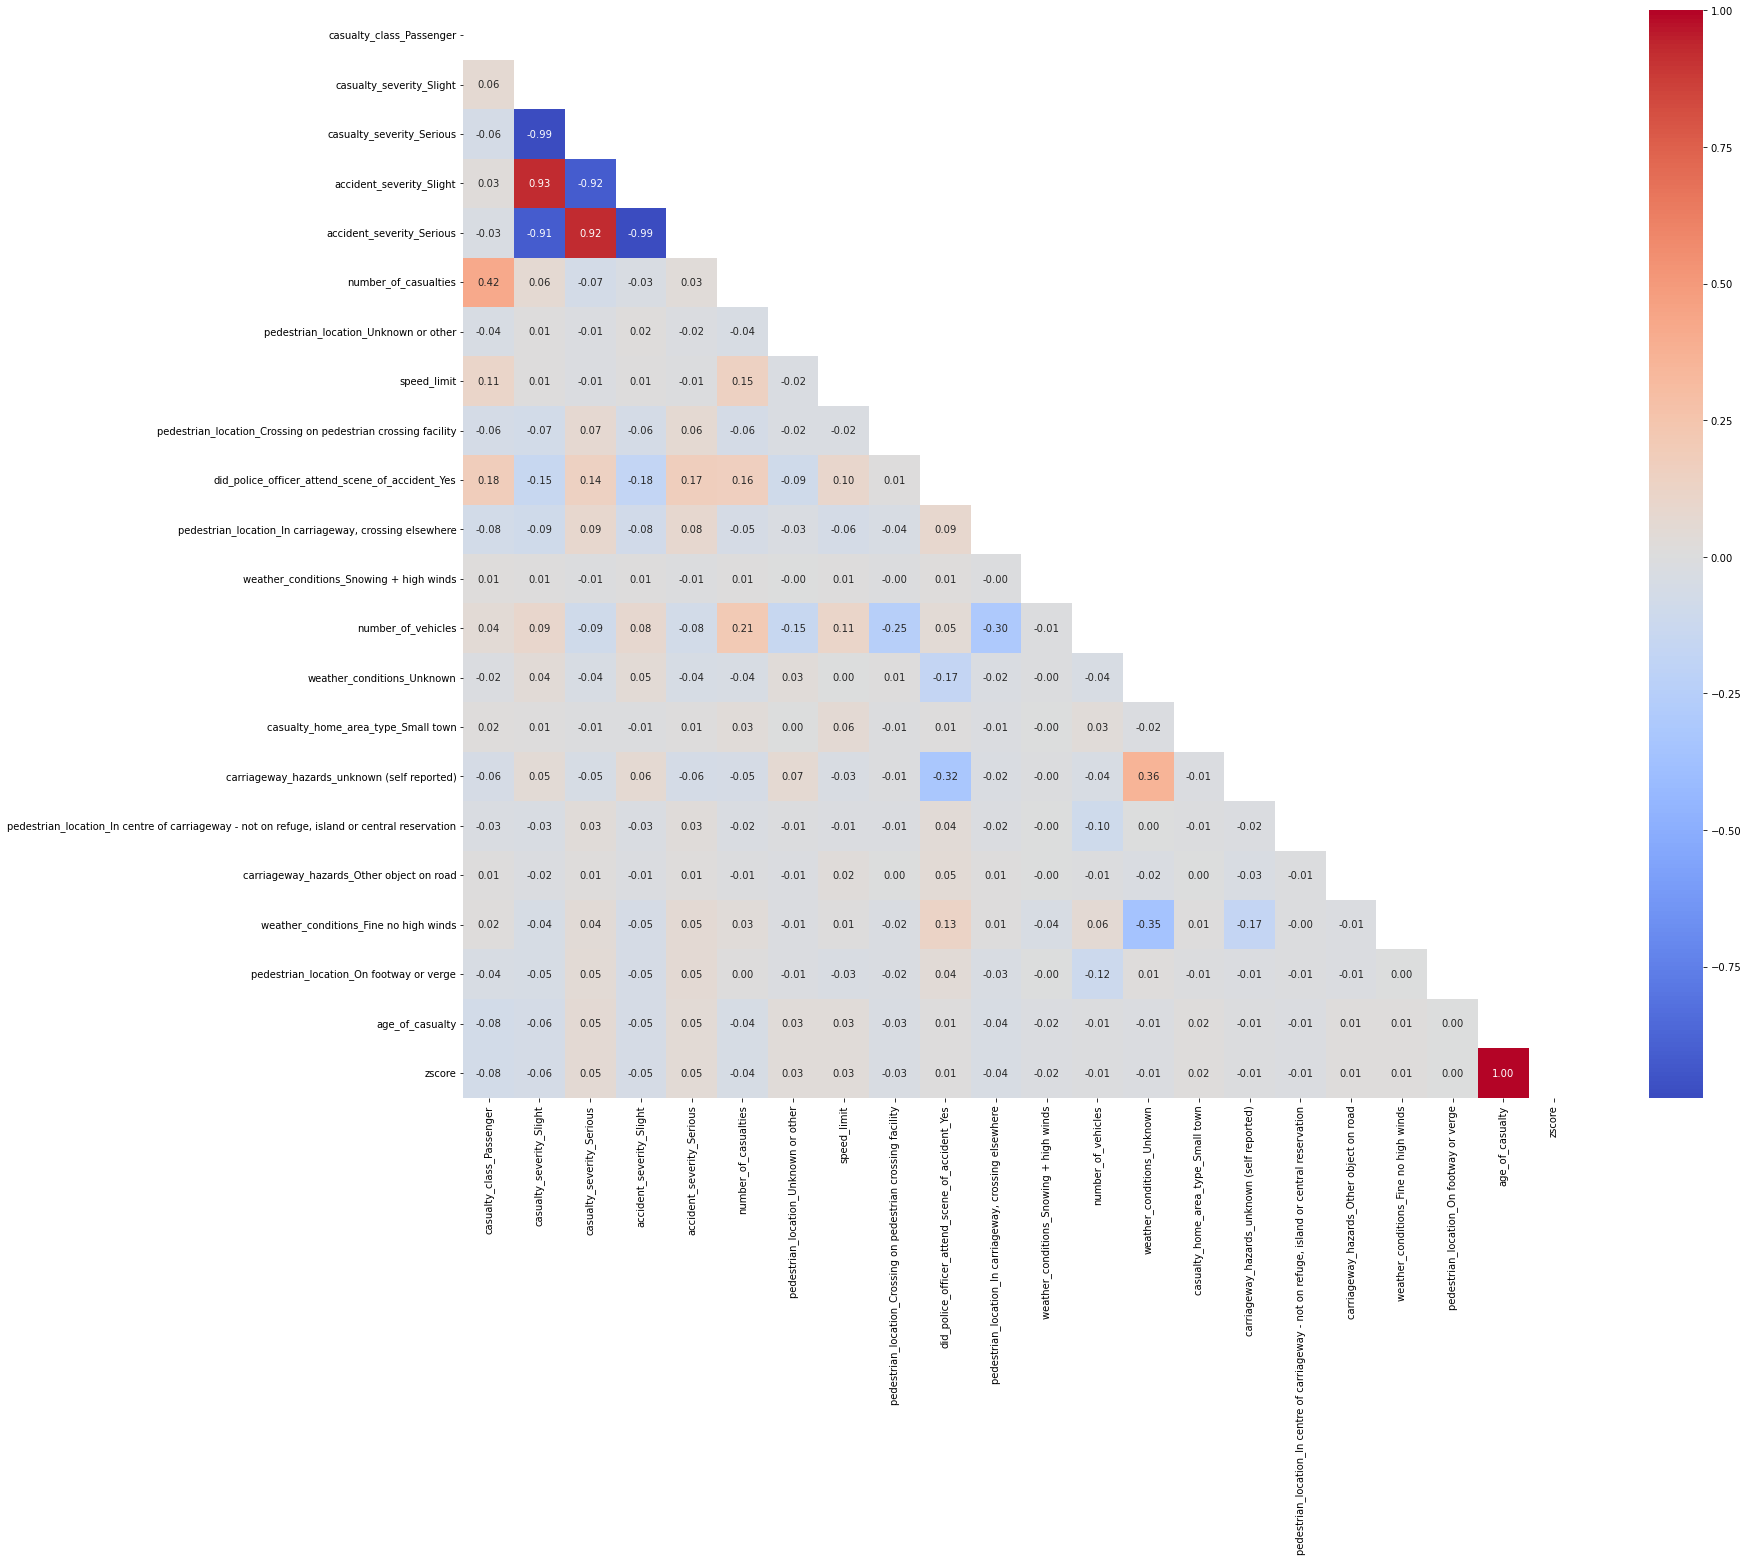

In [33]:
#plotting corelation Matrix
plt.figure(figsize = (25,20))
m2= np.triu(corr2)
sns.heatmap(corr2, annot = True,cmap= 'coolwarm', fmt='.2f', mask=m2)

From the Corelation Matrix 

- We observe that there is a strong postive correlation between the variables number casualities and Casuality Class Passenger(0.42)
- There is a relation between carriage way hazards unknown self reported and weatherconditions unknown(0.36) which expressing the possibility that unpredictable carriage way dangers may be more likely to be encountered by vehicles when weather conditions like rain, snow, or fog create hazardous road conditions. 
- Number of vehicles and number of casualities(0.21) which implies as the number of vehicles engaged in an accident rises number of casualties also rises.
- Did police attendend the scene of accident and casuality class passenger(0.18)
- Accident Severity serious and Did police attendend the scene of accident(0.17)
- Did police attendend the scene of accident and pedestrain Location Unknown or other(0.16)
- Speed limit and number of casualities(0.15)
- Did police attendend the scene of accident and Casuality Severity(0.14)
- Weather Conditions High_no winds and Did police attendend the scene of accident(0.13)
- number of vehicles and Sppedlimit(0.11)
- Did police attendend the scene of accident and Spped limit(0.10)








In [34]:
trainset.dtypes

casualty_class_Passenger                                                                       float64
casualty_severity_Slight                                                                       float64
casualty_severity_Serious                                                                      float64
accident_severity_Slight                                                                       float64
accident_severity_Serious                                                                      float64
number_of_casualties                                                                           float64
pedestrian_location_Unknown or other                                                           float64
speed_limit                                                                                    float64
pedestrian_location_Crossing on pedestrian crossing facility                                   float64
did_police_officer_attend_scene_of_accident_Yes                          

In [35]:
#Creating the new  dataset with required columns
tdf=trainset.loc[:,['age_of_casualty','casualty_severity_Serious','accident_severity_Slight',
                   'pedestrian_location_Unknown or other','speed_limit',
                   'did_police_officer_attend_scene_of_accident_Yes',
                   'weather_conditions_Snowing + high winds',
                   'number_of_vehicles','casualty_home_area_type_Small town',
                   'weather_conditions_Fine no high winds','carriageway_hazards_Other object on road',
                    'did_police_officer_attend_scene_of_accident_Yes',
                   'accident_severity_Slight','casualty_class_Passenger','casualty_severity_Slight','number_of_casualties']]

In [36]:
#tdf=trainset.loc[:,['age_of_casualty','casualty_severity_Serious','accident_severity_Serious','speed_limit','weather_conditions_Fine no high winds','did_police_officer_attend_scene_of_accident_Yes',
                 #  'pedestrian_location_On footway or verge','carriageway_hazards_Pedestrian in carriageway - not injured','number_of_vehicles','weather_conditions_Snowing no high winds',
                 #  'weather_conditions_Raining + high winds','weather_conditions_Unknown','casualty_class_Pedestrian','number_of_casualties','accident_severity_Slight']]
#tdf.shape

In [37]:
#Creating the new  dataset with required columns
tedf=testset.loc[:,['age_of_casualty','casualty_severity_Serious','accident_severity_Slight',
                   'pedestrian_location_Unknown or other','speed_limit',
                   'did_police_officer_attend_scene_of_accident_Yes',
                   'weather_conditions_Snowing + high winds',
                   'number_of_vehicles','casualty_home_area_type_Small town',
                   'weather_conditions_Fine no high winds','carriageway_hazards_Other object on road',
                    'did_police_officer_attend_scene_of_accident_Yes',
                   'accident_severity_Slight','casualty_class_Passenger','casualty_severity_Slight','number_of_casualties']]
tedf.shape

(3214, 16)

In [38]:
#tedf=testset.loc[:,['age_of_casualty','casualty_severity_Serious','accident_severity_Serious','speed_limit','weather_conditions_Fine no high winds','did_police_officer_attend_scene_of_accident_Yes',
                 #  'pedestrian_location_On footway or verge','carriageway_hazards_Pedestrian in carriageway - not injured','number_of_vehicles','weather_conditions_Snowing no high winds',
                  # 'weather_conditions_Raining + high winds','weather_conditions_Unknown','casualty_class_Pedestrian','number_of_casualties','accident_severity_Slight']]
#tedf.shape

We have already created dummy variables for the dataset in the group assignment using the same dummy variables here

In [39]:
#Standarizing Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

t_ta= tdf["age_of_casualty"].values
t_pre = tdf.drop("age_of_casualty", axis=1)

# fit_transform returns a NumPy array, so we need to put it back 
# into a Pandas dataframe
scaled_vals = scaler.fit_transform(t_pre)
tdf = pd.DataFrame(scaled_vals, columns=t_pre.columns)

# put the non-scaled target back in
tdf['age_of_casualty'] = t_ta

# inspect the data
tdf.head()

,casualty_severity_Serious,accident_severity_Slight,pedestrian_location_Unknown or other,speed_limit,did_police_officer_attend_scene_of_accident_Yes,weather_conditions_Snowing + high winds,number_of_vehicles,casualty_home_area_type_Small town,weather_conditions_Fine no high winds,carriageway_hazards_Other object on road,did_police_officer_attend_scene_of_accident_Yes,accident_severity_Slight,casualty_class_Passenger,casualty_severity_Slight,number_of_casualties,age_of_casualty
0,-0.388164,0.423763,-0.116143,0.32800,-1.368159,-0.019504,0.139475,-0.087543,0.537636,-0.123226,-1.368159,0.423763,-0.342207,0.392046,-0.409822,21.0
1,-0.388164,0.423763,-0.116143,0.32800,-1.368159,-0.019504,0.139475,-0.087543,0.537636,-0.123226,-1.368159,0.423763,-0.342207,0.392046,-0.409822,35.0
2,-0.388164,0.423763,-0.116143,-0.88342,-1.368159,-0.019504,0.139475,-0.087543,0.537636,-0.123226,-1.368159,0.423763,-0.342207,0.392046,-0.409822,19.0
3,-0.388164,0.423763,-0.116143,0.32800,-1.368159,-0.019504,0.139475,-0.087543,0.537636,-0.123226,-1.368159,0.423763,-0.342207,0.392046,-0.409822,26.0
4,-0.388164,0.423763,-0.116143,0.32800,-1.368159,-0.019504,0.139475,-0.087543,0.537636,-0.123226,-1.368159,0.423763,-0.342207,0.392046,-0.409822,47.0


In [40]:
tdf.shape

(7889, 16)

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

te_ta = tedf["age_of_casualty"].values
te_pre = tedf.drop("age_of_casualty", axis=1)

# fit_transform returns a NumPy array, so we need to put it back 
# into a Pandas dataframe
scaled_vals = scaler.fit_transform(te_pre)
tedf = pd.DataFrame(scaled_vals, columns=te_pre.columns)

# put the non-scaled target back in
tedf['age_of_casualty'] = te_ta

# inspect the data
tedf.head()

,casualty_severity_Serious,accident_severity_Slight,pedestrian_location_Unknown or other,speed_limit,did_police_officer_attend_scene_of_accident_Yes,weather_conditions_Snowing + high winds,number_of_vehicles,casualty_home_area_type_Small town,weather_conditions_Fine no high winds,carriageway_hazards_Other object on road,did_police_officer_attend_scene_of_accident_Yes,accident_severity_Slight,casualty_class_Passenger,casualty_severity_Slight,number_of_casualties,age_of_casualty
0,-0.410764,0.445877,-0.119164,-0.885692,0.7424,-0.017642,-1.466381,-0.088541,0.540666,-0.133164,0.7424,0.445877,-0.352377,0.413863,-0.404524,-1.481530
1,-0.410764,0.445877,-0.119164,-0.885692,0.7424,-0.017642,-1.466381,-0.088541,0.540666,-0.133164,0.7424,0.445877,-0.352377,0.413863,-0.404524,-2.149225
2,-0.410764,0.445877,-0.119164,-0.885692,0.7424,-0.017642,-1.466381,-0.088541,0.540666,-0.133164,0.7424,0.445877,-0.352377,0.413863,-0.404524,0.454783
3,-0.410764,0.445877,-0.119164,-0.885692,0.7424,-0.017642,-1.466381,-0.088541,0.540666,-0.133164,0.7424,0.445877,-0.352377,0.413863,-0.404524,-1.548300
4,-0.410764,0.445877,-0.119164,0.311874,0.7424,-0.017642,-1.466381,-0.088541,0.540666,-0.133164,0.7424,0.445877,-0.352377,0.413863,-0.404524,-1.214453


In [42]:
tedf.shape

(3214, 16)

In [43]:
#Creating Train sets
xtr = tdf.drop("age_of_casualty", axis=1)
ytr = tdf["age_of_casualty"].copy()

In [44]:
print (xtr.shape)
print (ytr.shape)

(7889, 15)
(7889,)


In [45]:
#Creating test set
xte = tedf.drop("age_of_casualty", axis=1)
yte = tedf["age_of_casualty"].copy()

In [46]:
print (xte.shape)
print (yte.shape)

(3214, 15)
(3214,)


# Modelling

Here I am using different models to predict the best Models of my dataset by trainset and testset.
I am using following algorithms
- Baseline Model
- Linear Regression
- Random Forest
- Decision tree
- KNN
I picked these because I was familiar about their perfomances and complexity

In [47]:
#Considering Mean value for the baseline Model
me_ra = ytr.median()
me_ra

33.0

We will use the root mean square error to evaluate the regression precision of every model and contrast them with one another.We can also use Mean absolute error.

# BaseLine Model

In [48]:
#Base line model
from sklearn.metrics import mean_squared_error
# each row of yhat will contain the median rating
yht = np.full((ytr.shape[0], 1), me_ra)
bl_mse = mean_squared_error(ytr, yht)
# take square root
bl_rmse = np.sqrt(bl_mse)
bl_rmse

14.53638983668544

In [49]:
#Creating a Function to diplay the scores of all different models
def displayscores(s):
    print(f"RMSE scores:",s)
    print(f"Mean RMSE:",s.mean())
    print(f"RMSE Standard deviation: {s.std():.3f}")
    

# Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

#calling  Linear regression function

l_reg = LinearRegression()
l_st=time.time()
scoring_metrics = {
     'r2_score': make_scorer(r2_score)
}
# cross validating parts of 10 parts to have  average accuracy score 
l_reg_scr = cross_val_score(l_reg, xtr, ytr, scoring="neg_mean_squared_error", cv=10)
r2_scr = cross_val_score(l_reg, xtr, ytr, scoring=scoring_metrics['r2_score'], cv=10)

# we have to take the opposite of the MSE to calculate the RMSE 
rmse_lin_scr = np.sqrt(-l_reg_scr)

displayscores(rmse_lin_scr)


RMSE scores: [11.70942085 12.30232542 12.81829907 12.29822861 12.52246756 18.13947753
 15.83537337 12.60696885 16.94856546 17.9419722 ]
Mean RMSE: 14.312309891340323
RMSE Standard deviation: 2.456


In [51]:
#fit the Linear regression to the training set 
l_reg.fit(xtr, ytr)


#print the R2 score of the Linear regression model 
l_reg.score (xtr, ytr)



0.013794839161353156

The linear regression model's R2 is not high.It implies that its precision will be poor.

In [52]:

li_yht=l_reg.predict(xtr)

#printing rise of  Linear model
li_rmse = np.sqrt(mean_squared_error(ytr, li_yht)) 
li_rmse



14.32129329498251

Rmse is lower than the baseline model which suggests we are in right approach

In [53]:
# Let's predict on the training set
lr_yht = l_reg.predict(xtr)

# Calculate how much time it took to tune the hyperparameters and train the model
l_du = time.time() - l_st
print(f'The duration of Linear Regression model took {l_du:.3f} seconds')

The duration of Linear Regression model took 0.100 seconds


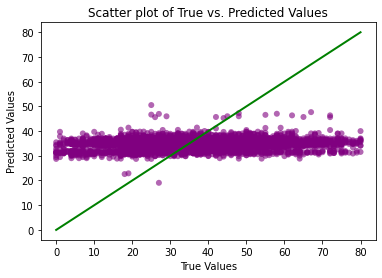

In [54]:
fig, ax = plt.subplots()
ax.scatter(ytr, lr_yht, edgecolors='None', c='purple', alpha=0.6)
ax.plot([ytr.min(), ytr.max()], [ytr.min(), ytr.max()], 'g', lw=2)
ax.set_xlabel('True Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Scatter plot of True vs. Predicted Values')
plt.show()

If the predicted values are accurate we will see a nice aligment with the redline,but in this scenario it is not happening which was expected

In [55]:
import os
from joblib import dump
# creating a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
dump(l_reg, 'models/lin_reg.joblib')

['models/lin_reg.joblib']

# Random Forest
Using Random Grid Search, we want to determine the optimal number for our hyperparameters.To determine which combos will produce best results, we must experiment.

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
# specifing  hyperparameters , their values
# n_estimators = number of decision trees used in the random forest
# max depth : maximum number of levels in the trees
# min_samples_Split = Minimum number of samples required to split a node
p_grid = {'n_estimators': [10,50, 100,500], 'max_depth': [2, 4, 6, 8,10, None]}
f_reg = RandomForestRegressor()
# start a new timer
rf_st=time.time()
# we will use 10-fold cross-validation with 10 random combinations to try
# we  want to get the train score for later
rfgrid_search = RandomizedSearchCV(f_reg, p_grid, cv=10, n_iter=10, scoring='neg_mean_squared_error', random_state=7, return_train_score=True)
# fit the estimator on the training set
rfgrid_search.fit(xtr, ytr)


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [2, 4, 6, 8, 10, None],
                                        'n_estimators': [10, 50, 100, 500]},
                   random_state=7, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [57]:
# Good fitting random forest models
be_rf = rfgrid_search.best_estimator_
be_rf

RandomForestRegressor(max_depth=4, n_estimators=50)

 RandomForestRegressor(max_depth=4, n_estimators=50) from  the output we can say the best model is having  50 estimators with maximum depth of 4.

In [58]:
rfs= cross_val_score(be_rf, xtr, ytr, scoring="neg_mean_squared_error", cv=10)
rfs = np.sqrt(-rfs)
displayscores(rfs)

RMSE scores: [11.6983093  12.25174496 12.74137596 12.21920592 12.39564879 17.8766254
 15.63534567 12.52669614 16.43528954 17.96355888]
Mean RMSE: 14.17438005512307
RMSE Standard deviation: 2.385


As we notice that Rmse is better than the Baseline and Linear Regression model

In [59]:
#Validing Rmse
vls = rfgrid_search.cv_results_["mean_test_score"]
tr_s = rfgrid_search.cv_results_["mean_train_score"]
ps = rfgrid_search.cv_results_["params"]
for val_score, train_score, param in zip(vls, tr_s, ps):
    print(np.sqrt(-vls), np.sqrt(-tr_s), ps)

[14.4082628  14.36840966 14.40022215 14.46959848 14.41961846 14.88275155
 14.38800771 14.69432001 14.53458242 14.44900763] [14.25542482 14.11128558 13.94151765 13.77754127 14.2561134  13.51217625
 13.9456454  13.67111353 13.8052496  14.25765911] [{'n_estimators': 50, 'max_depth': 2}, {'n_estimators': 50, 'max_depth': 4}, {'n_estimators': 500, 'max_depth': 6}, {'n_estimators': 50, 'max_depth': 8}, {'n_estimators': 100, 'max_depth': 2}, {'n_estimators': 50, 'max_depth': None}, {'n_estimators': 50, 'max_depth': 6}, {'n_estimators': 10, 'max_depth': 10}, {'n_estimators': 10, 'max_depth': 8}, {'n_estimators': 10, 'max_depth': 2}]
[14.4082628  14.36840966 14.40022215 14.46959848 14.41961846 14.88275155
 14.38800771 14.69432001 14.53458242 14.44900763] [14.25542482 14.11128558 13.94151765 13.77754127 14.2561134  13.51217625
 13.9456454  13.67111353 13.8052496  14.25765911] [{'n_estimators': 50, 'max_depth': 2}, {'n_estimators': 50, 'max_depth': 4}, {'n_estimators': 500, 'max_depth': 6}, {'n_e

In [60]:
# the best model's RMSE
rf_rmse=np.sqrt(-rfgrid_search.best_score_)
print(f'The good fitted Random Forest model has a RMSE of: {rf_rmse}')

The good fitted Random Forest model has a RMSE of: 14.368409661416573


In [61]:

rf_yht = be_rf.predict(xtr)
# Calculating how much time it took to tune the hyperparameters and train the model
rf_du = time.time() - rf_st
print(f'The Random Forest model took {rf_du:.3f} seconds')

The Random Forest model took 21.193 seconds


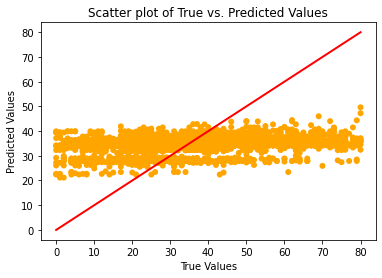

In [62]:
fig, ax = plt.subplots()
ax.scatter(ytr,rf_yht, edgecolors='None', c='orange', alpha=1)
ax.plot([ytr.min(), ytr.max()], [ytr.min(), ytr.max()], 'r', lw=2)
ax.set_xlabel('True Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Scatter plot of True vs. Predicted Values')
plt.show()

In [63]:
#Saving the random forest model
dump(be_rf, 'models/rf_reg.joblib')

['models/rf_reg.joblib']

# Decision Tree
GridSearch will be used to fine-tune the decision tree hyperparameters. It will allow us to choose from a variety of combos that we will provide to discover the algorithm's ideal hyperparameters.

In [64]:
# from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# search for the best hyperparameters for the decision trees, using GridSearch
# and thus cross-validation. We give here several combinations for the hyperparameters to compare.
dtgrid= {'min_samples_split': [1,2,3,6], 'max_depth': [2,4,None]}
#n_estimators: Number of trees in random forest
#max_depth: Maximum number of levels in tree
# min_samples_split: Minimum number of samples required to split a node
Dec_reg = DecisionTreeRegressor()
# start a timer
dt_st=time.time()
#Cross-validation with 10 splits
# we also want  to return the train score later
dtgrid_search = GridSearchCV(Dec_reg, dtgrid, cv=10,
scoring='neg_mean_squared_error', return_train_score=True)
#We fit the training data to the best model (and thus estimators)
dtgrid_search.fit(xtr, ytr)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, None],
                         'min_samples_split': [1, 2, 3, 6]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [65]:
be_dt=dtgrid_search.best_estimator_
be_dt

DecisionTreeRegressor(max_depth=4, min_samples_split=6)

Best Decision tree model have a depth of 4 and with 6splits.

In [66]:
dt_cvs= cross_val_score(be_dt, xtr, ytr, scoring="neg_mean_squared_error", cv=10)
dt_rmse_scores = np.sqrt(-dt_cvs)
displayscores(dt_rmse_scores)

RMSE scores: [11.69935027 12.21534482 12.79848922 12.3017188  12.484662   17.92575053
 15.82700095 12.56018087 16.57200108 18.05434593]
Mean RMSE: 14.243884447040433
RMSE Standard deviation: 2.416


In [67]:
 # train & validating RMSE
dtvls = dtgrid_search.cv_results_["mean_test_score"]
dt_trs = dtgrid_search.cv_results_["mean_train_score"]
dt_ps = dtgrid_search.cv_results_["params"]
for dt_val_score, dt_train_score, dt_param in zip(dtvls, dt_trs, dt_ps):
    print(np.sqrt(-dtvls), np.sqrt(-dt_trs), dt_ps)

[        nan 14.49635097 14.49635097 14.49635097         nan 14.44870376
 14.44870376 14.44737036         nan 15.29950655 15.2376507  15.04632693] [        nan 14.28075161 14.28075161 14.28075161         nan 14.15105783
 14.15105783 14.15239856         nan 13.44952706 13.47317085 13.5672013 ] [{'max_depth': 2, 'min_samples_split': 1}, {'max_depth': 2, 'min_samples_split': 2}, {'max_depth': 2, 'min_samples_split': 3}, {'max_depth': 2, 'min_samples_split': 6}, {'max_depth': 4, 'min_samples_split': 1}, {'max_depth': 4, 'min_samples_split': 2}, {'max_depth': 4, 'min_samples_split': 3}, {'max_depth': 4, 'min_samples_split': 6}, {'max_depth': None, 'min_samples_split': 1}, {'max_depth': None, 'min_samples_split': 2}, {'max_depth': None, 'min_samples_split': 3}, {'max_depth': None, 'min_samples_split': 6}]
[        nan 14.49635097 14.49635097 14.49635097         nan 14.44870376
 14.44870376 14.44737036         nan 15.29950655 15.2376507  15.04632693] [        nan 14.28075161 14.28075161 14.28

In [68]:
dt_rmse=np.sqrt(-dtgrid_search.best_score_)
print(f'The best Decision Trees model has a RMSE of: {dt_rmse}')

The best Decision Trees model has a RMSE of: 14.447370363389995


RMSE is superior to the baseline model and slightly inferior to linear regression. 

In [69]:
# let's predict on the training set
dt_yht= be_dt.predict(xtr)
# Calculate how much time it took to tune the hyperparameters and train the model
dt_du = time.time() - dt_st
print(f'The Decision Trees model took {dt_du:.3f} seconds')

The Decision Trees model took 0.642 seconds


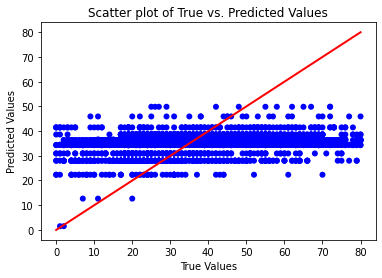

In [70]:
#Graph between Real and  Preedicted
fig, ax = plt.subplots()
ax.scatter(ytr, dt_yht, edgecolors='None', c='blue', alpha=1)
ax.plot([ytr.min(), ytr.max()], [ytr.min(), ytr.max()], 'r', lw=2)
ax.set_xlabel('True Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Scatter plot of True vs. Predicted Values')
plt.show()

In [71]:
# save the model
dump( be_dt, 'models/dt_reg.joblib')

['models/dt_reg.joblib']

# KNN Model
KNN grid search is used for tuning the parameters, and various combinations must be tested to find the best model.

In [72]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the KNN model
knn = KNeighborsRegressor()

# Define the hyperparameters and their values to search
knn_param_grid = {
    'n_neighbors': [9,12,15,21,24,30,51,63,72,84,96],
    'weights': ['uniform', 'distance']
}
knn_st = time.time()

# Create the GridSearchCV object
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Fit the best model and hyperparameters to the training set
knn_grid_search.fit(xtr, ytr)

# Print the best hyperparameters and mean test score
print("Best hyperparameters:", knn_grid_search.best_params_)
print("Best test score:", np.sqrt(-knn_grid_search.best_score_))


Best hyperparameters: {'n_neighbors': 63, 'weights': 'uniform'}
Best test score: 14.536437325711528


In [73]:
#Best Model
knn_bt=knn_grid_search.best_estimator_
knn_bt

KNeighborsRegressor(n_neighbors=63)

The best model of KNN has 63 neighbours(k=63)

In [74]:
knn_cvs= cross_val_score(knn_bt, xtr, ytr, scoring="neg_mean_squared_error", cv=10)
knncv_rmses = np.sqrt(-knn_cvs)
displayscores(knncv_rmses)

RMSE scores: [11.75385708 12.27533976 12.8755553  12.27376604 12.37303636 18.11602282
 16.04368271 12.62968891 16.77857388 17.82605648]
Mean RMSE: 14.294557934601372
RMSE Standard deviation: 2.437


It is the worst Model as its Rmse greater than the baseline model

In [75]:
#Validating RMSe
knn_vals = knn_grid_search.cv_results_["mean_test_score"]
knn_trs = knn_grid_search.cv_results_["mean_train_score"]
knn_ps = knn_grid_search.cv_results_["params"]
for knn_val_score, knn_train_score, knn_param in zip(knn_vals, knn_trs, knn_ps):
    print(np.sqrt(-knn_vals), np.sqrt(-knn_trs), knn_ps)

[15.07497511 15.51131041 14.8394349  15.28289789 14.72899684 15.19551554
 14.62791924 15.12046193 14.61756692 15.12294101 14.6113482  15.08752774
 14.58623181 15.07968051 14.53643733 15.0674621  14.54528233 15.06549081
 14.54807814 15.06860853 14.55084389 15.0737255 ] [14.45078404 14.00532293 14.29434595 13.79319051 14.23544321 13.68815756
 14.20799611 13.61869172 14.18798633 13.57817922 14.15790714 13.51702132
 14.16725124 13.47006543 14.15800517 13.44378967 14.16896763 13.44041687
 14.17090037 13.4288833  14.17305752 13.42366779] [{'n_neighbors': 9, 'weights': 'uniform'}, {'n_neighbors': 9, 'weights': 'distance'}, {'n_neighbors': 12, 'weights': 'uniform'}, {'n_neighbors': 12, 'weights': 'distance'}, {'n_neighbors': 15, 'weights': 'uniform'}, {'n_neighbors': 15, 'weights': 'distance'}, {'n_neighbors': 21, 'weights': 'uniform'}, {'n_neighbors': 21, 'weights': 'distance'}, {'n_neighbors': 24, 'weights': 'uniform'}, {'n_neighbors': 24, 'weights': 'distance'}, {'n_neighbors': 30, 'weights

In [76]:
knn_rmsescore=np.sqrt(-knn_grid_search.best_score_)
print(f'The best Knn model has a RMSE of: {knn_rmsescore}')

The best Knn model has a RMSE of: 14.536437325711528


In [77]:
# make predictions
knn_yht = knn_bt.predict(xtr)
# Calculate how much time it took to tune the hyperparameters and train the model
knn_du = time.time() - knn_st
print(f'The Knn model took {knn_du:.3f} seconds')

The Knn model took 37.656 seconds


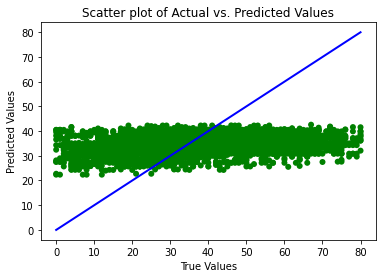

In [78]:
fig, ax = plt.subplots()
ax.scatter(ytr, knn_yht, edgecolors='None', c='green', alpha=1)
ax.plot([ytr.min(), ytr.max()], [ytr.min(), ytr.max()], 'b', lw=2)
ax.set_xlabel('True Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Scatter plot of Actual vs. Predicted Values')
plt.show()

In [79]:
# save the model
dump(knn_bt, 'models/knn_reg.joblib')

['models/knn_reg.joblib']

# Comparing the models

In [80]:

print(f'Decision Trees: {dt_du:.3f} seconds')
print(f'Random Forest: {rf_du:.3f} seconds')
print(f'Knn: {knn_du:.3f} seconds')

Decision Trees: 0.642 seconds
Random Forest: 21.193 seconds
Knn: 37.656 seconds


In [81]:
print('Linear Regression')
displayscores(rmse_lin_scr)
print('###################')
print('')

print('Decision Trees')
displayscores(dt_rmse_scores)
print('###################')
print('')
print('Random Forest')
displayscores(rfs)
print('###################')
print('')

print('')
print('Knn')
displayscores(knncv_rmses)

Linear Regression
RMSE scores: [11.70942085 12.30232542 12.81829907 12.29822861 12.52246756 18.13947753
 15.83537337 12.60696885 16.94856546 17.9419722 ]
Mean RMSE: 14.312309891340323
RMSE Standard deviation: 2.456
###################

Decision Trees
RMSE scores: [11.69935027 12.21534482 12.79848922 12.3017188  12.484662   17.92575053
 15.82700095 12.56018087 16.57200108 18.05434593]
Mean RMSE: 14.243884447040433
RMSE Standard deviation: 2.416
###################

Random Forest
RMSE scores: [11.6983093  12.25174496 12.74137596 12.21920592 12.39564879 17.8766254
 15.63534567 12.52669614 16.43528954 17.96355888]
Mean RMSE: 14.17438005512307
RMSE Standard deviation: 2.385
###################


Knn
RMSE scores: [11.75385708 12.27533976 12.8755553  12.27376604 12.37303636 18.11602282
 16.04368271 12.62968891 16.77857388 17.82605648]
Mean RMSE: 14.294557934601372
RMSE Standard deviation: 2.437


In [82]:
Compare= {
    'Baseline RMSE': [bl_rmse],
    'Linear regression': [li_rmse.mean()],
    'Decision Trees': [dt_rmse],
    'Random Forest': [rf_rmse],
    'Knn': [knn_rmsescore],
}
sc_df=pd.DataFrame (Compare).transpose()
sc_df.columns=['Compare'] 
sc_df["Vs Baseline"]= 100*(bl_rmse-sc_df["Compare"])/bl_rmse
sc_df

,Compare,Vs Baseline
Baseline RMSE,14.536390,0.000000
Linear regression,14.321293,1.479711
Decision Trees,14.447370,0.612391
Random Forest,14.368410,1.155584
Knn,14.536437,-0.000327


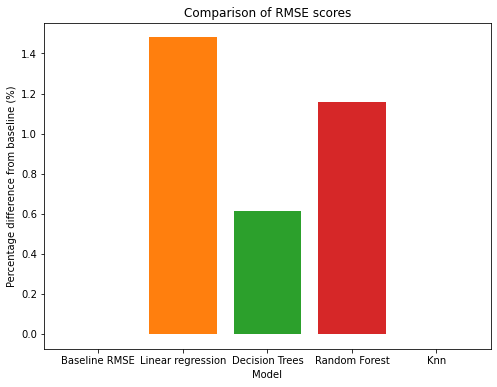

In [83]:
import matplotlib.pyplot as plt

# define figure size
fig = plt.figure(figsize=(8, 6))

# define color values
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# create a bar plot with custom colors
plt.bar(sc_df.index, sc_df["Vs Baseline"], color=colors)

# add labels and title
plt.xlabel("Model")
plt.ylabel("Percentage difference from baseline (%)")
plt.title("Comparison of RMSE scores")

# show the plot
plt.show()

After comparing the Models we can see that Linear regression and Random forest have better Accuracy when compared to other models however the  R2 value of Linear Regression is lower  whcih says it have bad prediction so I have to choose Random Forest and Deccision tree as my models

In [84]:
from joblib import load
best_lin= load("models/lin_reg.joblib")
best_rf = load("models/rf_reg.joblib")

# Feature Importance

In [85]:
#Important Features of Random Forest
features_rf=be_rf.feature_importances_

In [86]:
rf_imp_df = pd.DataFrame(features_rf,xtr.columns) 
rf_imp_df.rename(columns= {0: 'Feature importance'}, inplace=True)
# feature importance in descending order

rf_imp_df.sort_values('Feature importance', ascending=False)

,Feature importance
number_of_casualties,0.341962
casualty_class_Passenger,0.166412
number_of_vehicles,0.136795
speed_limit,0.098140
pedestrian_location_Unknown or other,0.045057
casualty_severity_Slight,0.040462
casualty_severity_Serious,0.034045
weather_conditions_Fine no high winds,0.023127
accident_severity_Slight,0.022919
carriageway_hazards_Other object on road,0.020868


In [87]:
#Decision tree Important Features
dt_fes=be_dt.feature_importances_

In [88]:
dt_fes_ = pd.DataFrame(dt_fes,xtr.columns) 
dt_fes_.rename(columns= {0: 'Feature importance'}, inplace=True)
#sort the feature importance by descending order

dt_fes_.sort_values('Feature importance', ascending=False)

,Feature importance
number_of_casualties,0.362702
casualty_class_Passenger,0.174279
casualty_severity_Slight,0.131075
number_of_vehicles,0.129408
speed_limit,0.062662
did_police_officer_attend_scene_of_accident_Yes,0.046119
carriageway_hazards_Other object on road,0.040742
casualty_severity_Serious,0.038983
casualty_home_area_type_Small town,0.014030
accident_severity_Slight,0.000000


The important predictor features in both the models are 
- number_of_casualties
- casualty_class_Passenger
- number_of_vehicles 	
- speed_limit
- casualty_severity_Slight

Number of vehicles does not have any impact in predicting age of casuality.

In [89]:
# creation of new dataframes with the features I want
fe_new=xtr.loc[:,["speed_limit","casualty_class_Passenger", 'casualty_severity_Serious', 'number_of_vehicles',
                         'weather_conditions_Fine no high winds','number_of_casualties','carriageway_hazards_Other object on road',
                  'casualty_severity_Serious','did_police_officer_attend_scene_of_accident_Yes',
                        ]]
fet_new=xte.loc[:,["speed_limit","casualty_class_Passenger", 'casualty_severity_Serious', 'number_of_vehicles',
                         'weather_conditions_Fine no high winds','number_of_casualties','carriageway_hazards_Other object on road',
                   'casualty_severity_Serious','did_police_officer_attend_scene_of_accident_Yes'
                  ]]
                        
print (fe_new.shape)
print (fet_new.shape)

(7889, 10)
(3214, 10)


# Reconstructing Model

In [90]:
#Random Forest
rf_grid2 = {'n_estimators': [10,50, 100,500], 'max_depth': [2, 4, 6, 8,10,None]}
rf_reg2 = RandomForestRegressor(random_state=7)
#start a new timer
rf_st2 = time.time()
# we'll use 10-fold cross-validation
rf_grid_search2 = RandomizedSearchCV(rf_reg2, rf_grid2, cv=10, n_iter=10,
scoring='neg_mean_squared_error', random_state=7, return_train_score=True)
#Fit the best model (and best estimator) to the new training set
rf_grid_search2.fit(fe_new, ytr)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=7),
                   param_distributions={'max_depth': [2, 4, 6, 8, 10, None],
                                        'n_estimators': [10, 50, 100, 500]},
                   random_state=7, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [91]:
# the best model
final_Rf = rf_grid_search2.best_estimator_
final_Rf

RandomForestRegressor(max_depth=4, n_estimators=50, random_state=7)

In [92]:
#the best model's RMSE
rffinal_rmse = np.sqrt(-rf_grid_search2.best_score_)
print(f'The best new Random Forest model has a RMSE of: {rffinal_rmse}')

The best new Random Forest model has a RMSE of: 14.387216077154989


In [93]:
# training and validation RMSE
rf_vals = rf_grid_search2.cv_results_["mean_test_score"]
rf_ts = rf_grid_search2.cv_results_["mean_train_score"]
rf_ps = rf_grid_search2.cv_results_["params"]
for rf_val_score, rf_train_score, rf_param in zip(rf_vals, rf_ts, rf_ps):
    print(np.sqrt(-rf_vals), np.sqrt(-rf_ts), rf_ps)

[14.41240822 14.38721608 14.425547   14.5649602  14.41347689 14.87931412
 14.43641544 14.78085507 14.61228164 14.43474795] [14.25626596 14.12301444 13.96997101 13.82468365 14.25629815 13.66044694
 13.97342608 13.75250328 13.85146335 14.26147924] [{'n_estimators': 50, 'max_depth': 2}, {'n_estimators': 50, 'max_depth': 4}, {'n_estimators': 500, 'max_depth': 6}, {'n_estimators': 50, 'max_depth': 8}, {'n_estimators': 100, 'max_depth': 2}, {'n_estimators': 50, 'max_depth': None}, {'n_estimators': 50, 'max_depth': 6}, {'n_estimators': 10, 'max_depth': 10}, {'n_estimators': 10, 'max_depth': 8}, {'n_estimators': 10, 'max_depth': 2}]
[14.41240822 14.38721608 14.425547   14.5649602  14.41347689 14.87931412
 14.43641544 14.78085507 14.61228164 14.43474795] [14.25626596 14.12301444 13.96997101 13.82468365 14.25629815 13.66044694
 13.97342608 13.75250328 13.85146335 14.26147924] [{'n_estimators': 50, 'max_depth': 2}, {'n_estimators': 50, 'max_depth': 4}, {'n_estimators': 500, 'max_depth': 6}, {'n_e

In [94]:
#  predicting on the new training set
rf_yht3= rf_grid_search2.predict(fe_new)
# Calculate how much time it took 
best_rf_du = time.time() - rf_st2
print(f'The best new Random Forest model took {best_rf_du:.3f} seconds')

The best new Random Forest model took 19.398 seconds


We observe that the Rmse of the new random forest model is higher than that of the earlier model, that is, before taking into account Feature Importances, indicating that the new model is inferior to the previous model.


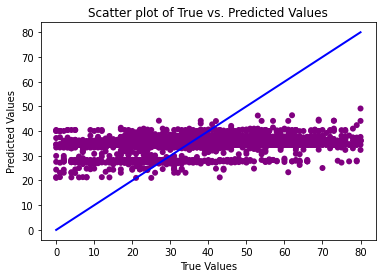

In [95]:
fig, ax = plt.subplots()
ax.scatter(ytr,rf_yht3, edgecolors='None', c='purple', alpha=1)
ax.plot([ytr.min(), ytr.max()], [ytr.min(), ytr.max()], 'b', lw=2)
ax.set_xlabel('True Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Scatter plot of True vs. Predicted Values')
plt.show()

In [96]:
fdt_grid2= {'min_samples_split': [2, 3, 4, 5], 'max_depth': [2, 4, 6, 8,10,None]}
#n_estimators: Number of trees in random forest
#max_depth: Maximum number of levels in tree
# min_samples_split: Minimum number of samples required to split a node
Dt_reg2 = DecisionTreeRegressor()
# start a timer
dt_st2=time.time()
#Cross-validation with 10 splits
# we also want it to return the train score later
dt_search2 = GridSearchCV(Dt_reg2, fdt_grid2, cv=10,
scoring='neg_mean_squared_error', return_train_score=True)
# fit  training data to the best model (and thus estimators)
dt_search2.fit(fe_new, ytr)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, None],
                         'min_samples_split': [2, 3, 4, 5]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [97]:
be_dtf=dt_search2.best_estimator_
be_dtf

DecisionTreeRegressor(max_depth=4, min_samples_split=3)

In [98]:
#the best model's RMSE
dt_rmse2 = np.sqrt(-dt_search2.best_score_)
print(f'The best new Decision tree model has a RMSE of: {dt_rmse2}')

The best new Decision tree model has a RMSE of: 14.442017082621442


We observe that the Rmse of the new decision tree model is same when compared to previous one 

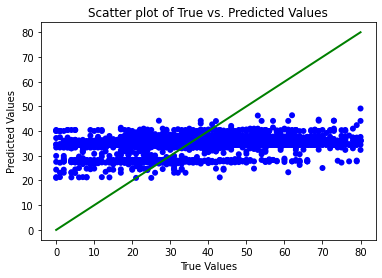

In [99]:
fig, ax = plt.subplots()
ax.scatter(ytr,rf_yht3, edgecolors='None', c='blue', alpha=1)
ax.plot([ytr.min(), ytr.max()], [ytr.min(), ytr.max()], 'g', lw=2)
ax.set_xlabel('True Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Scatter plot of True vs. Predicted Values')
plt.show()

In [100]:
# let's predict on the new training set
dt_yht3= dt_search2.predict(fe_new)
# Calculate how much time it took to tune the hyperparameters and train the model
best_dt_du = time.time() - dt_st2
print(f'The best new Decision tree model took {best_dt_du:.3f} seconds')

The best new Decision tree model took 1.382 seconds


In [101]:
print(f'The best new decision tree  model took {best_dt_du:.3f} seconds')
print(f'The best new Random Forest model took {best_rf_du:.3f} seconds')


The best new decision tree  model took 1.382 seconds
The best new Random Forest model took 19.398 seconds


In [102]:
FinalComaprision= {
    'Baseline RMSE': [bl_rmse],
    'Decision tree': [dt_rmse.mean()],
    'Decision Tree Final': [dt_rmse2 .mean()],
    'Random Forest': [rf_rmse],
    'Random  Final Forest': [rffinal_rmse],
    }
rmse_fi_df=pd.DataFrame (FinalComaprision).transpose()
rmse_fi_df.columns=['FinalComaprision'] 
rmse_fi_df["Vs Baseline"]= 100*(bl_rmse-rmse_fi_df["FinalComaprision"])/bl_rmse
rmse_fi_df

,FinalComaprision,Vs Baseline
Baseline RMSE,14.536390,0.000000
Decision tree,14.447370,0.612391
Decision Tree Final,14.442017,0.649217
Random Forest,14.368410,1.155584
Random Final Forest,14.387216,1.026209


Random Forest Final is boosted by adding variables according to feature importances.

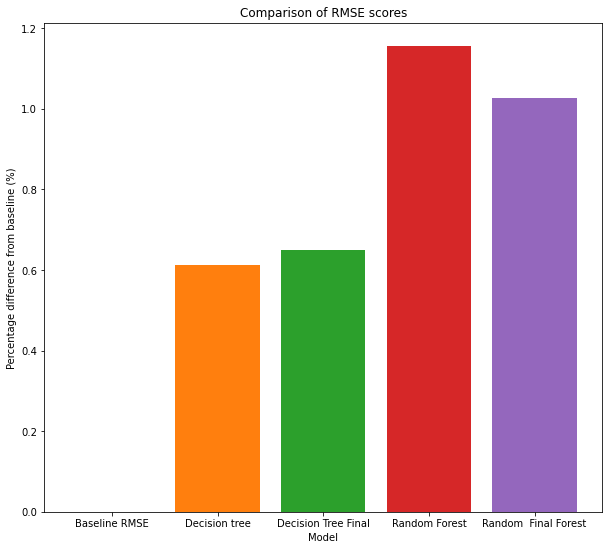

In [103]:
import matplotlib.pyplot as plt

# define figure size
fig = plt.figure(figsize=(10, 9))

# define color values
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# create a bar plot with custom colors
plt.bar(rmse_fi_df.index, rmse_fi_df["Vs Baseline"], color=colors)

# add labels and title
plt.xlabel("Model")
plt.ylabel("Percentage difference from baseline (%)")
plt.title("Comparison of RMSE scores")

# show the plot
plt.show()

# Evaluating for Test Set

In [104]:
fi_rf = final_Rf.feature_importances_
fi_rf_df = pd.DataFrame(fi_rf, fe_new.columns)
fi_rf_df.rename (columns={0:'Feature importance'},inplace=True)
fi_rf_df.sort_values('Feature importance', ascending=False)

,Feature importance
number_of_casualties,0.369379
casualty_class_Passenger,0.174711
number_of_vehicles,0.148286
speed_limit,0.121853
casualty_severity_Serious,0.053858
carriageway_hazards_Other object on road,0.032455
casualty_severity_Serious,0.029937
did_police_officer_attend_scene_of_accident_Yes,0.026391
did_police_officer_attend_scene_of_accident_Yes,0.025588
weather_conditions_Fine no high winds,0.017541


In [105]:
fi_dt = be_dtf.feature_importances_
fi_dt_df = pd.DataFrame(fi_dt, fe_new.columns)
fi_dt_df.rename (columns={0:'Feature importance'},inplace=True)
fi_dt_df.sort_values('Feature importance', ascending=False)

,Feature importance
number_of_casualties,0.390213
casualty_class_Passenger,0.180725
number_of_vehicles,0.134194
speed_limit,0.083674
casualty_severity_Serious,0.082602
did_police_officer_attend_scene_of_accident_Yes,0.047824
carriageway_hazards_Other object on road,0.042249
casualty_severity_Serious,0.038518
weather_conditions_Fine no high winds,0.000000
did_police_officer_attend_scene_of_accident_Yes,0.000000


In [106]:
final_rf_yht =  final_Rf.predict(fet_new)
Test_rf_rmse = np.sqrt(mean_squared_error(yte , final_rf_yht)) 
print (f' Random Forest RMSE: {Test_rf_rmse}')

 Random Forest RMSE: 34.95951939587444


In [107]:
final_rf_yht.mean()

34.85639140989151

In [108]:
rf_Comparision= {
    'Baseline RMSE': [bl_rmse],
    'Randon Forest initial Train': [rf_rmse], 
    'Randon Forest Final Train': [rffinal_rmse], 
    'Random Forest Final Test': [Test_rf_rmse],
}

rfrmse_df= pd.DataFrame(rf_Comparision).transpose()
rfrmse_df.columns=['rf_Comparision']
rfrmse_df["Vs Baseline"] =100*(bl_rmse-rfrmse_df["rf_Comparision"])/bl_rmse
rfrmse_df

,rf_Comparision,Vs Baseline
Baseline RMSE,14.536390,0.000000
Randon Forest initial Train,14.368410,1.155584
Randon Forest Final Train,14.387216,1.026209
Random Forest Final Test,34.959519,-140.496573


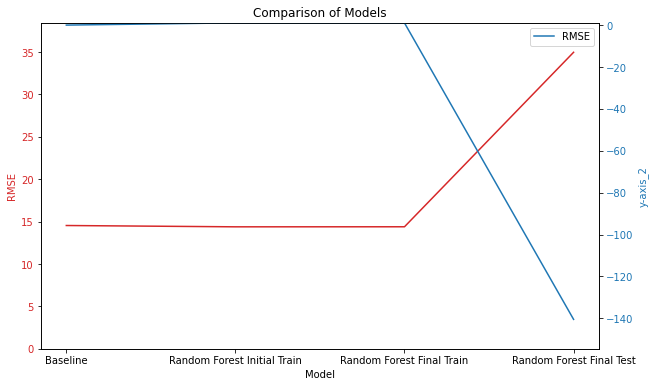

In [109]:
import matplotlib.pyplot as plt

# Define the data to plot
labels = ['Baseline', 'Random Forest Initial Train', 'Random Forest Final Train', 'Random Forest Final Test']
rmse_values = [14.536390, 14.381378, 14.387216, 34.959519]
y_axis_2_values = [0.000000, 1.066371, 1.026209, -140.496573]

# Set up the figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create the first line chart for RMSE values
color = 'tab:red'
ax1.set_xlabel('Model')
ax1.set_ylabel('RMSE', color=color)
ax1.plot(labels, rmse_values, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0, max(rmse_values) * 1.1])

# Create the second line chart for y-axis_2 values
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('y-axis_2', color=color)
ax2.plot(labels, y_axis_2_values, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([min(y_axis_2_values) * 1.1, max(y_axis_2_values) * 1.1])

# Set up the chart title and legend
plt.title('Comparison of Models')
plt.legend(['RMSE', 'y-axis_2'])

# Display the chart
plt.show()


The hyper parameter tuning procedure has enhanced the model's performance on the training data as the end random forest model has a lower the RMSE than the original random forest model. Although the model may still be over fitting or not applying well to new data, the end test the RMSE is still significantly greater than the baseline a RMSE.

In [110]:

dtfinal_yht =  be_dtf.predict(fet_new)
dttest_rmse = np.sqrt(mean_squared_error(yte , dtfinal_yht)) 
print (f' Decision tree: {dttest_rmse}')

 Decision tree: 34.96292186528712


In [111]:
dtrmsecomparision= {
    'Baseline RMSE': [bl_rmse],
    'Decision Tree Train': [dt_rmse], 
    'Decision Tree  Train': [dt_rmse2], 
    'Decision Tree   Test': [dttest_rmse],
}
dt_frmsed= pd.DataFrame(dtrmsecomparision).transpose()
dt_frmsed.columns=["dtrmsecomparision"]
dt_frmsed["Vs Baseline"] =100*(bl_rmse-dt_frmsed["dtrmsecomparision"])/bl_rmse
dt_frmsed

,dtrmsecomparision,Vs Baseline
Baseline RMSE,14.536390,0.000000
Decision Tree Train,14.447370,0.612391
Decision Tree Train,14.442017,0.649217
Decision Tree Test,34.962922,-140.519980


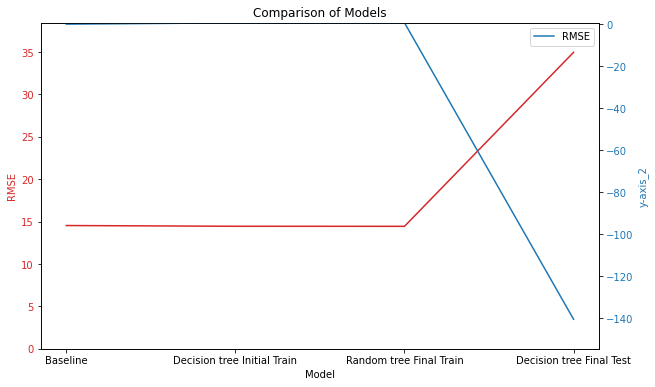

In [112]:
import matplotlib.pyplot as plt

# Define the data to plot
labels = ['Baseline', 'Decision tree Initial Train', 'Random tree Final Train', 'Decision tree Final Test']
rmse_values = [14.536390, 14.447370, 14.442017, 34.962922]
y_axis_2_values = [0.000000, 0.612391, 0.649217, -140.519980]

# Set up the figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create the first line chart for RMSE values
color = 'tab:red'
ax1.set_xlabel('Model')
ax1.set_ylabel('RMSE', color=color)
ax1.plot(labels, rmse_values, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0, max(rmse_values) * 1.1])

# Create the second line chart for y-axis_2 values
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('y-axis_2', color=color)
ax2.plot(labels, y_axis_2_values, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([min(y_axis_2_values) * 1.1, max(y_axis_2_values) * 1.1])

# Set up the chart title and legend
plt.title('Comparison of Models')
plt.legend(['RMSE', 'y-axis_2'])

# Display the chart
plt.show()


The decision tree model probably learns the noise in the training data, which results in good training set performance but bad test set performance. 

We have started with 90000 data and we have selected 12000 from the intial data set we merged the data with casualities.Almost
almost 87% have been removed from the data set and I have deleted the missing values and outliers which was much data in my perception which results in negative impact on the models.

In the end, I lacked the resources necessary to train and test my models and give them a high success rate.

# Possiblities and Improvements

As the data set is taken from the Uk gov website about the accidents hich are occuring during a year , we will have to get the data train and test the models radomly retrain the model and test it. How ever I have used only some models hear we can use other models like Neural Network, Ada boost Regressor, SVM to analyse the best accuracies.
Then to improve my models accuracy I need to have some more data to predict the age of the person.

- Algorithm to calculate the type of insurance that a person can get based on accident severity,Vehile condition,Casuality Sevritywith respect to their age group.(Grouping the casualities within an average groups)
- Adding this can make company to calculate the type of sanction that a casuality can claim which saves the company from any misleads.

In [113]:
# Finish Timer

"---- The notebook is completed in %s minutes----"%((str(round((time.time() - Start_time)/60,4))))

'---- The notebook is completed in 1.584 minutes----'